<a href="https://colab.research.google.com/github/vgauraha62/great_scalper/blob/main/trading_bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd

class TradingBot:
    def __init__(self, short_window, long_window):
        self.short_window = short_window
        self.long_window = long_window
        self.profits_losses = pd.DataFrame(columns=['Date', 'Action', 'Symbol', 'Quantity', 'Price', 'Profit/Loss'])
        self.portfolio = {}

    def execute_trade(self, date, action, symbol, quantity, price):
        # Perform trade execution logic here
        # ...
        # Calculate profit/loss
        profit_loss = self.calculate_profit_loss(action, quantity, price)

        # Record trade in the DataFrame
        trade = pd.DataFrame([[date, action, symbol, quantity, price, profit_loss]], columns=['Date', 'Action', 'Symbol', 'Quantity', 'Price', 'Profit/Loss'])
        self.profits_losses = pd.concat([self.profits_losses, trade], ignore_index=True)

    def calculate_profit_loss(self, action, quantity, price):
        # Implement your profit/loss calculation logic here
        # ...
        # Return the calculated profit/loss
        if action == 'Buy':
            return 0  # Replace with your calculation
        elif action == 'Sell':
            return 0  # Replace with your calculation

    def run_strategy(self, symbol, start_date, end_date):
        # Fetch historical data from Yahoo Finance API
        data = yf.download(symbol, start=start_date, end=end_date)
        data.reset_index(inplace=True)

        # Calculate the EMA values
        data['EMA_short'] = data['Close'].ewm(span=self.short_window, adjust=False).mean()
        data['EMA_long'] = data['Close'].ewm(span=self.long_window, adjust=False).mean()

        # Generate trading signals
        data['Signal'] = 0
        data.loc[data['EMA_short'] > data['EMA_long'], 'Signal'] = 1
        data.loc[data['EMA_short'] < data['EMA_long'], 'Signal'] = -1

        # Execute trades based on the signals
        for i in range(1, len(data)):
            if data['Signal'].iloc[i] == 1 and data['Signal'].iloc[i - 1] == -1:
                self.execute_trade(data['Date'].iloc[i], 'Buy', symbol, 1, data['Close'].iloc[i])
            elif data['Signal'].iloc[i] == -1 and data['Signal'].iloc[i - 1] == 1:
                self.execute_trade(data['Date'].iloc[i], 'Sell', symbol, 1, data['Close'].iloc[i])

    def print_profits_losses(self):
        print(self.profits_losses)

# Example usage
bot = TradingBot(short_window=9, long_window=15)
bot.run_strategy('^NSEBANK', '2023-01-01', '2023-06-30')
bot.print_profits_losses()

[*********************100%***********************]  1 of 1 completed
        Date Action    Symbol Quantity         Price Profit/Loss
0 2023-01-04   Sell  ^NSEBANK        1  42958.800781           0
1 2023-03-08    Buy  ^NSEBANK        1  41577.101562           0
2 2023-03-10   Sell  ^NSEBANK        1  40485.449219           0
3 2023-04-03    Buy  ^NSEBANK        1  40813.050781           0
4 2023-06-15   Sell  ^NSEBANK        1  43443.601562           0


In [ ]:
import yfinance as yf
import pandas as pd

class TradingBot:
    def __init__(self, short_window, long_window):
        self.short_window = short_window
        self.long_window = long_window
        self.profits_losses = pd.DataFrame(columns=['Date', 'Action', 'Symbol', 'Quantity', 'Price', 'Profit/Loss'])
        self.portfolio = {}

    def execute_trade(self, date, action, symbol, quantity, price):
        # Perform trade execution logic here
        if action == 'Buy':
            if symbol in self.portfolio:
                self.portfolio[symbol] += quantity
            else:
                self.portfolio[symbol] = quantity
        elif action == 'Sell':
            if symbol in self.portfolio:
                self.portfolio[symbol] -= quantity
                if self.portfolio[symbol] == 0:
                    del self.portfolio[symbol]

        # Calculate profit/loss
        profit_loss = self.calculate_profit_loss(action, quantity, price)

        # Record trade in the DataFrame
        trade = pd.DataFrame([[date, action, symbol, quantity, price, profit_loss]], columns=['Date', 'Action', 'Symbol', 'Quantity', 'Price', 'Profit/Loss'])
        self.profits_losses = pd.concat([self.profits_losses, trade], ignore_index=True)

    def calculate_profit_loss(self, action, quantity, price):
          if action == 'Buy':
            return 0  # Return zero for Buy action (assuming no profit/loss calculation at entry)
          elif action == 'Sell':
            if len(self.profits_losses) > 0:
              entry_price = self.profits_losses['Price'].iloc[-1]  # Get the entry price from the previous trade
              return price - entry_price  # Calculate the profit/loss as the difference between exit and entry price
          else:
            return 0  # Return zero if there is no previous trade to calculate profit/loss


    def run_strategy(self, symbol, start_date, end_date):
        # Fetch historical data from Yahoo Finance API
        data = yf.download(symbol, start=start_date, end=end_date)
        data.reset_index(inplace=True)

        # Calculate the EMA values
        data['EMA_short'] = data['Close'].ewm(span=self.short_window, adjust=False).mean()
        data['EMA_long'] = data['Close'].ewm(span=self.long_window, adjust=False).mean()

        # Generate trading signals
        data['Signal'] = 0
        data.loc[data['EMA_short'] > data['EMA_long'], 'Signal'] = 1
        data.loc[data['EMA_short'] < data['EMA_long'], 'Signal'] = -1

        # Execute trades based on the signals
        for i in range(1, len(data)):
            if data['Signal'].iloc[i] == 1 and data['Signal'].iloc[i - 1] == -1:
                self.execute_trade(data['Date'].iloc[i], 'Buy', symbol, 1, data['Close'].iloc[i])
            elif data['Signal'].iloc[i] == -1 and data['Signal'].iloc[i - 1] == 1:
                self.execute_trade(data['Date'].iloc[i], 'Sell', symbol, 1, data['Close'].iloc[i])

    def print_profits_losses(self):
        print(self.profits_losses)

# Example usage
bot = TradingBot(short_window=3, long_window=30)
bot.run_strategy('^NSEBANK', '2023-01-01', '2023-06-30')
bot.print_profits_losses()


[*********************100%***********************]  1 of 1 completed
        Date Action    Symbol Quantity         Price  Profit/Loss
0 2023-01-04   Sell  ^NSEBANK        1  42958.800781         None
1 2023-03-08    Buy  ^NSEBANK        1  41577.101562            0
2 2023-03-10   Sell  ^NSEBANK        1  40485.449219 -1091.652344
3 2023-04-03    Buy  ^NSEBANK        1  40813.050781            0


In [ ]:
pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 2.8 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
import ta
import pandas as pd

class CandlestickAnalysisBot:
    def __init__(self):
        self.data = None

    def fetch_data(self, symbol, start_date, end_date):
        # Fetch historical data from Yahoo Finance API
        self.data = yf.download(symbol, start=start_date, end=end_date, interval='1h')
        self.data.reset_index(inplace=True)

    def analyze_candlestick_patterns(self):
        if self.data is None:
            print("No data available. Please fetch data first using fetch_data() method.")
            return

        # Apply candlestick pattern analysis
        self.data['Pattern'] = ta.momentum.candlestick(self.data['Open'], self.data['High'], self.data['Low'], self.data['Close'])

        # Print candlestick patterns
        print(self.data[['Date', 'Open', 'High', 'Low', 'Close', 'Pattern']])

# Example usage
bot = CandlestickAnalysisBot()
bot.fetch_data('^NSEBANK', '2023-01-01', '2023-06-30')
bot.analyze_candlestick_patterns()


[*********************100%***********************]  1 of 1 completed


AttributeError: ignored

[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


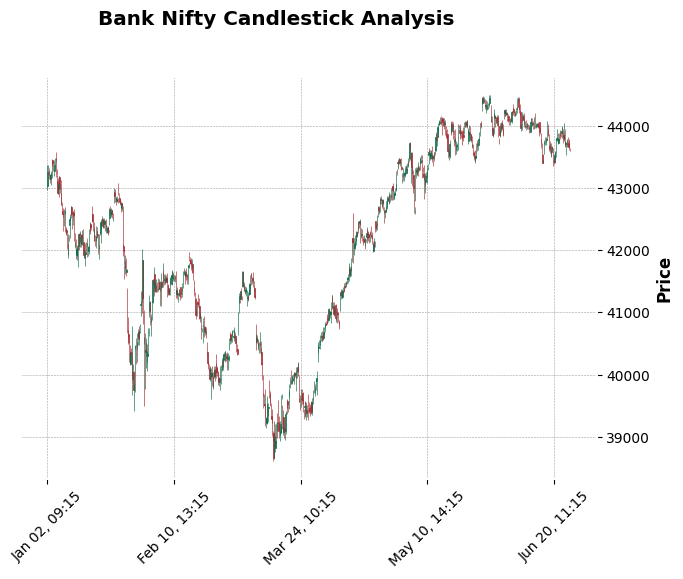

In [ ]:
import yfinance as yf
import mplfinance as mpf

class CandlestickAnalysisBot:
    def __init__(self):
        self.data = None

    def fetch_data(self, symbol, start_date, end_date):
        # Fetch historical data from Yahoo Finance API
        self.data = yf.download(symbol, start=start_date, end=end_date, interval='1h')

    def analyze_candlestick_patterns(self):
        if self.data is None:
            print("No data available. Please fetch data first using fetch_data() method.")
            return

        # Plot candlestick chart with patterns
        mpf.plot(self.data, type='candle', style='charles', title='Bank Nifty Candlestick Analysis')

# Example usage
bot = CandlestickAnalysisBot()
bot.fetch_data('^NSEBANK', '2023-01-01', '2023-06-30')
bot.analyze_candlestick_patterns()


In [ ]:
import yfinance as yf
import pandas as pd

class CandlestickTradingBot:
    def __init__(self):
        self.data = None
        self.profits_losses = pd.DataFrame(columns=['Entry', 'Exit', 'Profit/Loss'])

    def fetch_data(self, symbol, start_date, end_date):
        # Fetch historical data from Yahoo Finance API
        self.data = yf.download(symbol, start=start_date, end=end_date, interval='1h')
        self.data.reset_index(inplace=True)

    def analyze_candlestick_patterns(self):
        if self.data is None:
            print("No data available. Please fetch data first using fetch_data() method.")
            return

        self.data['EMA20'] = self.data['Close'].ewm(span=20).mean()
        self.data['EMA50'] = self.data['Close'].ewm(span=50).mean()

        in_trade = False
        entry_price = 0.0
        stop_loss = 0.0
        target = 0.0

        for index, row in self.data.iterrows():
            if not in_trade and row['EMA20'] > row['EMA50'] and self.data.loc[index - 1, 'EMA20'] <= self.data.loc[index - 1, 'EMA50']:
                in_trade = True
                entry_price = row['Close']
                stop_loss = entry_price - (entry_price * 0.005)  # Set stop loss at 0.5%
                target = entry_price + (entry_price * 0.01)  # Set target at 1%
                continue

            if in_trade:
                if row['Low'] <= stop_loss:
                    exit_price = stop_loss
                    in_trade = False
                    trade = {'Entry': entry_price, 'Exit': exit_price, 'Profit/Loss': exit_price - entry_price}
                    self.profits_losses = self.profits_losses.append(trade, ignore_index=True)
                elif row['High'] >= target:
                    exit_price = target
                    in_trade = False
                    trade = {'Entry': entry_price, 'Exit': exit_price, 'Profit/Loss': exit_price - entry_price}
                    self.profits_losses = self.profits_losses.append(trade, ignore_index=True)

    def print_profit_loss(self):
        print(self.profits_losses)

# Example usage
bot = CandlestickTradingBot()
bot.fetch_data('^NSEBANK', '2023-01-01', '2023-06-30')
bot.analyze_candlestick_patterns()
bot.print_profit_loss()


[*********************100%***********************]  1 of 1 completed
          Entry          Exit  Profit/Loss
0  43305.851562  42439.734531  -866.117031
1  42403.398438  41555.330469  -848.067969
2  41359.601562  40532.409531  -827.192031
3  40664.050781  41477.331797   813.281016
4  40022.300781  40822.746797   800.446016


<ipython-input-28-c30565b54099>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.profits_losses = self.profits_losses.append(trade, ignore_index=True)
<ipython-input-28-c30565b54099>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.profits_losses = self.profits_losses.append(trade, ignore_index=True)
<ipython-input-28-c30565b54099>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.profits_losses = self.profits_losses.append(trade, ignore_index=True)
<ipython-input-28-c30565b54099>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.profits_losses = self.profits_losses.append(trade, ignore_index=True)
<ipython-input-2

[*********************100%***********************]  1 of 1 completed
           Entry          Exit  Profit/Loss
0   43305.851562  43279.868052   -25.983511
1   43445.148438  43419.081348   -26.067089
2   42424.199219  42398.744699   -25.454520
3   42453.300781  42427.828801   -25.471980
4   41142.199219  41117.513899   -24.685320
5   41162.050781  41137.353551   -24.697230
6   41527.000000  41502.083800   -24.916200
7   41636.550781  41611.568851   -24.981930
8   40234.101562  40209.961102   -24.140461
9   39686.601562  39662.789602   -23.811961
10  39372.148438  39490.264883   118.116445
11  39713.199219  39832.338816   119.139598
12  41264.601562  41239.842802   -24.758761
13  42356.449219  42331.035349   -25.413870
14  43306.398438  43280.414598   -25.983839
15  43343.851562  43473.883117   130.031555
16  44016.148438  43989.738748   -26.409689
17  43956.398438  43930.024598   -26.373839
18  44043.300781  44016.874801   -26.425980
19  44243.699219  44217.152999   -26.546220
20  441

In [ ]:
import yfinance as yf
import pandas as pd

class CandlestickTradingBot:
    def __init__(self):
        self.data = None
        self.profits_losses = pd.DataFrame(columns=['Entry', 'Exit', 'Profit/Loss'])

    def fetch_data(self, symbol, start_date, end_date):
        # Fetch historical data from Yahoo Finance API
        self.data = yf.download(symbol, start=start_date, end=end_date, interval='1h')
        self.data.reset_index(inplace=True)

    def analyze_candlestick_patterns(self):
        if self.data is None:
            print("No data available. Please fetch data first using fetch_data() method.")
            return

        self.data['EMA20'] = self.data['Close'].ewm(span=20).mean()
        self.data['EMA50'] = self.data['Close'].ewm(span=50).mean()

        in_trade = False
        entry_price = 0.0
        stop_loss = 0.0
        target = 0.0

        for index, row in self.data.iterrows():
            if not in_trade and row['EMA20'] > row['EMA50'] and self.data.loc[index - 1, 'EMA20'] <= self.data.loc[index - 1, 'EMA50']:
                if row['Close'] > row['EMA20']:  # Check if current candle is bullish (close > EMA20)
                    in_trade = True
                    entry_price = row['Close']
                    stop_loss = entry_price - (entry_price * 0.02)  # Set stop loss at 2%
                    target = entry_price + (entry_price * 0.02)  # Set target at 2%
            elif in_trade:
                if row['Low'] <= stop_loss:
                    exit_price = stop_loss
                    in_trade = False
                    trade = {'Entry': entry_price, 'Exit': exit_price, 'Profit/Loss': exit_price - entry_price}
                    self.profits_losses = self.profits_losses.append(trade, ignore_index=True)
                elif row['High'] >= target:
                    exit_price = target
                    in_trade = False
                    trade = {'Entry': entry_price, 'Exit': exit_price, 'Profit/Loss': exit_price - entry_price}
                    self.profits_losses = self.profits_losses.append(trade, ignore_index=True)

    def print_profit_loss(self):
        print(self.profits_losses)

# Example usage
bot = CandlestickTradingBot()
bot.fetch_data('^NSEBANK', '2023-01-01', '2023-06-30')
bot.analyze_candlestick_patterns()
bot.print_profit_loss()


[*********************100%***********************]  1 of 1 completed
          Entry          Exit  Profit/Loss
0  43305.851562  42439.734531  -866.117031
1  42403.398438  41555.330469  -848.067969
2  41359.601562  40532.409531  -827.192031
3  40664.050781  41477.331797   813.281016
4  40022.300781  40822.746797   800.446016


<ipython-input-53-8b99273c0199>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.profits_losses = self.profits_losses.append(trade, ignore_index=True)
<ipython-input-53-8b99273c0199>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.profits_losses = self.profits_losses.append(trade, ignore_index=True)
<ipython-input-53-8b99273c0199>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.profits_losses = self.profits_losses.append(trade, ignore_index=True)
<ipython-input-53-8b99273c0199>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.profits_losses = self.profits_losses.append(trade, ignore_index=True)
<ipython-input-5

In [ ]:
import yfinance as yf
import pandas as pd

class CandlestickTradingBot:
    def __init__(self):
        self.data = None
        self.profits_losses = pd.DataFrame(columns=['Entry', 'Exit', 'Profit/Loss'])

    def fetch_data(self, symbol, start_date, end_date):
        # Fetch historical data from Yahoo Finance API
        self.data = yf.download(symbol, start=start_date, end=end_date, interval='1h')
        self.data.reset_index(inplace=True)

    def analyze_candlestick_patterns(self):
        if self.data is None:
            print("No data available. Please fetch data first using fetch_data() method.")
            return

        self.data['EMA20'] = self.data['Close'].ewm(span=9).mean()
        self.data['EMA50'] = self.data['Close'].ewm(span=15).mean()

        in_trade = False
        entry_price = 0.0
        stop_loss = 0.0
        target = 0.0

        for index, row in self.data.iterrows():
            if not in_trade and row['EMA20'] > row['EMA50'] and self.data.loc[index - 1, 'EMA20'] <= self.data.loc[index - 1, 'EMA50']:
                if row['Close'] > row['EMA20']:  # Check if current candle is bullish (close > EMA20)
                    in_trade = True
                    entry_price = row['Close']
                    stop_loss = entry_price - (entry_price * 0.01)  # Set stop loss at 1%
                    target = entry_price + (entry_price * 0.02)  # Set target at 2%
            elif in_trade:
                if row['Low'] <= stop_loss:
                    exit_price = stop_loss
                    in_trade = False
                    trade = {'Entry': entry_price, 'Exit': exit_price, 'Profit/Loss': exit_price - entry_price}
                    self.profits_losses = pd.concat([self.profits_losses, pd.DataFrame(trade, index=[0])], ignore_index=True)
                elif row['High'] >= target:
                    exit_price = target
                    in_trade = False
                    trade = {'Entry': entry_price, 'Exit': exit_price, 'Profit/Loss': exit_price - entry_price}
                    self.profits_losses = pd.concat([self.profits_losses, pd.DataFrame(trade, index=[0])], ignore_index=True)

    def print_profit_loss(self):
        print(self.profits_losses)

# Example usage
bot = CandlestickTradingBot()
bot.fetch_data('^NSEBANK', '2023-01-01', '2023-06-30')
bot.analyze_candlestick_patterns()
bot.print_profit_loss()


[*********************100%***********************]  1 of 1 completed
           Entry          Exit  Profit/Loss
0   43305.851562  42872.793047  -433.058516
1   42424.199219  41999.957227  -424.241992
2   42453.300781  42028.767773  -424.533008
3   41142.199219  41965.043203   822.843984
4   41162.050781  40750.430273  -411.620508
5   41527.000000  41111.730000  -415.270000
6   40234.101562  41038.783594   804.682031
7   39686.601562  39289.735547  -396.866016
8   39372.148438  40159.591406   787.442969
9   39713.199219  40507.463203   794.263984
10  41264.601562  42089.893594   825.292031
11  42356.449219  43203.578203   847.128984
12  43306.398438  42873.334453  -433.063984
13  43343.851562  44210.728594   866.877031
14  44243.699219  43801.262227  -442.436992
15  43863.449219  43424.814727  -438.634492


In [ ]:
import yfinance as yf
import pandas as pd

class CandlestickTradingBot:
    def __init__(self):
        self.data = None
        self.profits_losses = pd.DataFrame(columns=['Entry', 'Exit', 'Profit/Loss'])

    def fetch_data(self, symbol, start_date, end_date):
        # Fetch historical data from Yahoo Finance API
        self.data = yf.download(symbol, start=start_date, end=end_date, interval='5m')
        self.data.reset_index(inplace=True)

    def analyze_candlestick_patterns(self):
        if self.data is None:
            print("No data available. Please fetch data first using fetch_data() method.")
            return

        self.data['EMA20'] = self.data['Close'].ewm(span=9).mean()
        self.data['EMA50'] = self.data['Close'].ewm(span=21).mean()

        in_trade = False
        entry_price = 0.0
        stop_loss = 0.0
        target = 0.0

        for index, row in self.data.iterrows():
            if not in_trade and row['EMA20'] > row['EMA50'] and self.data.loc[index - 1, 'EMA20'] <= self.data.loc[index - 1, 'EMA50']:
                if row['Close'] > row['EMA20']:  # Check if current candle is bullish (close > EMA20)
                    in_trade = True
                    entry_price = row['Close']
                    stop_loss = entry_price - (entry_price * 0.0003)  # Set stop loss at 1%
                    target = entry_price + (entry_price * 0.003)  # Set target at 2%
            elif in_trade:
                if row['Low'] <= stop_loss:
                    exit_price = stop_loss
                    in_trade = False
                    trade = {'Entry': entry_price, 'Exit': exit_price, 'Profit/Loss': exit_price - entry_price}
                    self.profits_losses = pd.concat([self.profits_losses, pd.DataFrame(trade, index=[0])], ignore_index=True)
                elif row['High'] >= target:
                    exit_price = target
                    in_trade = False
                    trade = {'Entry': entry_price, 'Exit': exit_price, 'Profit/Loss': exit_price - entry_price}
                    self.profits_losses = pd.concat([self.profits_losses, pd.DataFrame(trade, index=[0])], ignore_index=True)

    def calculate_net_pnl(self):
        net_pnl = self.profits_losses['Profit/Loss'].sum()
        return net_pnl

    def print_profit_loss(self):
        print(self.profits_losses)

# Example usage
bot = CandlestickTradingBot()
bot.fetch_data('^NSEBANK', '2023-06-01', '2023-06-30')
bot.analyze_candlestick_patterns()
bot.print_profit_loss()
net_pnl = bot.calculate_net_pnl()
print("Net PNL: ", net_pnl)


[*********************100%***********************]  1 of 1 completed
           Entry          Exit  Profit/Loss
0   44061.601562  44048.383082   -13.218480
1   44122.699219  44109.462409   -13.236810
2   43963.250000  43950.061025   -13.188975
3   43923.851562  43910.674407   -13.177155
4   44178.800781  44165.547141   -13.253640
5   44084.550781  44071.325416   -13.225365
6   44168.449219  44300.954566   132.505348
7   44217.851562  44204.586207   -13.265355
8   44209.148438  44195.885693   -13.262745
9   44337.699219  44324.397909   -13.301310
10  44183.199219  44169.944259   -13.254960
11  44015.398438  44002.193818   -13.204620
12  44010.550781  43997.347616   -13.203165
13  44028.148438  44014.939993   -13.208445
14  44050.050781  44036.835766   -13.215015
15  44043.699219  44030.486109   -13.213110
16  44051.449219  44183.603566   132.154348
17  44033.050781  44019.840866   -13.209915
18  44029.550781  44016.341916   -13.208865
19  44008.250000  43995.047525   -13.202475
20  436

In [ ]:
import yfinance as yf
import pandas as pd

class CandlestickTradingBot:
    def __init__(self):
        self.data = None
        self.profits_losses = pd.DataFrame(columns=['Entry', 'Exit', 'Profit/Loss'])

    def fetch_data(self, symbol, start_date, end_date):
        # Fetch historical data from Yahoo Finance API
        self.data = yf.download(symbol, start=start_date, end=end_date, interval='1h')
        self.data.reset_index(inplace=True)

    def analyze_candlestick_patterns(self):
        if self.data is None:
            print("No data available. Please fetch data first using fetch_data() method.")
            return

        self.data['EMA20'] = self.data['Close'].ewm(span=9, adjust=False).mean()
        self.data['EMA50'] = self.data['Close'].ewm(span=15, adjust=False).mean()

        in_trade = False
        entry_price = 0.0
        stop_loss = 0.0
        target = 0.0

        for index, row in self.data.iterrows():
            if not in_trade and row['EMA20'] > row['EMA50'] and self.data.loc[index - 1, 'EMA20'] <= self.data.loc[index - 1, 'EMA50']:
                if row['Close'] > row['EMA20']:  # Check if current candle is bullish (close > EMA20)
                    in_trade = True
                    entry_price = row['Close']
                    stop_loss = entry_price + (entry_price * 0.02)  # Set stop loss at 2%
                    target = entry_price - (entry_price * 0.02)  # Set target at 2%
                else:  # Short sell if current candle is bearish (close < EMA20)
                    in_trade = True
                    entry_price = row['Close']
                    stop_loss = entry_price - (entry_price * 0.02)  # Set stop loss at 2%
                    target = entry_price + (entry_price * 0.02)  # Set target at 2%
            elif in_trade:
                if row['High'] >= stop_loss:
                    exit_price = stop_loss
                    in_trade = False
                    trade = {'Entry': entry_price, 'Exit': exit_price, 'Profit/Loss': entry_price - exit_price}
                    self.profits_losses = self.profits_losses.append(trade, ignore_index=True)
                elif row['Low'] <= target:
                    exit_price = target
                    in_trade = False
                    trade = {'Entry': entry_price, 'Exit': exit_price, 'Profit/Loss': entry_price - exit_price}
                    self.profits_losses = self.profits_losses.append(trade, ignore_index=True)

    def calculate_net_pnl(self):
        net_pnl = self.profits_losses['Profit/Loss'].sum()
        return net_pnl

    def print_profit_loss(self):
        print(self.profits_losses)

# Example usage
bot = CandlestickTradingBot()
bot.fetch_data('^NSEBANK', '2023-01-01', '2023-06-30')
bot.analyze_candlestick_patterns()
bot.print_profit_loss()
net_pnl = bot.calculate_net_pnl()
print("Net PNL: ", net_pnl)


[*********************100%***********************]  1 of 1 completed
          Entry          Exit  Profit/Loss
0  43305.851562  42439.734531   866.117031
1  42424.199219  41575.715234   848.483984
2  41142.199219  41965.043203  -822.843984
3  41162.050781  40338.809766   823.241016
4  40234.101562  41038.783594  -804.682031
5  39686.601562  40480.333594  -793.732031
6  41264.601562  42089.893594  -825.292031
7  42356.449219  43203.578203  -847.128984
8  43306.398438  44172.526406  -866.127969
9  44243.699219  43358.825234   884.873984
Net PNL:  -1537.0910156249956


<ipython-input-115-c9716e5c000b>:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.profits_losses = self.profits_losses.append(trade, ignore_index=True)
<ipython-input-115-c9716e5c000b>:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.profits_losses = self.profits_losses.append(trade, ignore_index=True)
<ipython-input-115-c9716e5c000b>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.profits_losses = self.profits_losses.append(trade, ignore_index=True)
<ipython-input-115-c9716e5c000b>:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.profits_losses = self.profits_losses.append(trade, ignore_index=True)
<ipython-inp

In [ ]:
import yfinance as yf
import pandas as pd

class CandlestickTradingBot:
    def __init__(self):
        self.data = None
        self.profits_losses = pd.DataFrame(columns=['Entry', 'Exit', 'Profit/Loss'])

    def fetch_data(self, symbol, start_date, end_date):
        # Fetch historical data from Yahoo Finance API
        self.data = yf.download(symbol, start=start_date, end=end_date, interval='1h')
        self.data.reset_index(inplace=True)

    def analyze_candlestick_patterns(self):
        if self.data is None:
            print("No data available. Please fetch data first using fetch_data() method.")
            return

        self.data['EMA20'] = self.data['Close'].ewm(span=20, adjust=False).mean()
        self.data['EMA50'] = self.data['Close'].ewm(span=40, adjust=False).mean()

        in_trade = False
        entry_price = 0.0
        stop_loss = 0.0
        target = 0.0

        for index, row in self.data.iterrows():
            if not in_trade and row['EMA20'] > row['EMA50'] and self.data.loc[index - 1, 'EMA20'] <= self.data.loc[index - 1, 'EMA50']:
                if row['Close'] > row['EMA20']:  # Check if current candle is bullish (close > EMA20)
                    in_trade = True
                    entry_price = row['Close']
                    stop_loss = entry_price + (entry_price * 0.02)  # Set stop loss at 2%
                    target = entry_price - (entry_price * 0.02)  # Set target at 2%
                else:  # Short sell if current candle is bearish (close < EMA20)
                    in_trade = True
                    entry_price = row['Close']
                    stop_loss = entry_price - (entry_price * 0.02)  # Set stop loss at 2%
                    target = entry_price + (entry_price * 0.02)  # Set target at 2%
            elif in_trade:
                if row['High'] >= stop_loss:
                    exit_price = stop_loss
                    in_trade = False
                    trade = pd.DataFrame({'Entry': [entry_price], 'Exit': [exit_price], 'Profit/Loss': [entry_price - exit_price]})
                    self.profits_losses = pd.concat([self.profits_losses, trade], ignore_index=True)
                elif row['Low'] <= target:
                    exit_price = target
                    in_trade = False
                    trade = pd.DataFrame({'Entry': [entry_price], 'Exit': [exit_price], 'Profit/Loss': [entry_price - exit_price]})
                    self.profits_losses = pd.concat([self.profits_losses, trade], ignore_index=True)

    def calculate_net_pnl(self):
        net_pnl = self.profits_losses['Profit/Loss'].sum()
        return net_pnl

    def print_profit_loss(self):
        print(self.profits_losses)

# Example usage
bot = CandlestickTradingBot()
bot.fetch_data('^NSEBANK', '2023-05-01', '2023-06-30')
bot.analyze_candlestick_patterns()
bot.print_profit_loss()
net_pnl = bot.calculate_net_pnl()
print("Net PNL: ", net_pnl)


[*********************100%***********************]  1 of 1 completed
          Entry          Exit  Profit/Loss
0  43461.800781  42592.564766   869.236016
1  43574.648438  44446.141406  -871.492969
2  44243.699219  43358.825234   884.873984
Net PNL:  882.6170312500035


In [ ]:
import yfinance as yf
import pandas as pd

class CandlestickTradingBot:
    def __init__(self):
        self.data = None
        self.profits_losses = pd.DataFrame(columns=['Entry', 'Exit', 'Profit/Loss', 'Trade'])
        self.buy_trades = 0
        self.sell_trades = 0

    def fetch_data(self, symbol, start_date, end_date):
        # Fetch historical data from Yahoo Finance API
        self.data = yf.download(symbol, start=start_date, end=end_date, interval='5m')
        self.data.reset_index(inplace=True)

    def analyze_candlestick_patterns(self):
        if self.data is None:
            print("No data available. Please fetch data first using fetch_data() method.")
            return

        self.data['EMA20'] = self.data['Close'].ewm(span=9, adjust=True).mean()
        self.data['EMA50'] = self.data['Close'].ewm(span=15, adjust=True).mean()

        in_trade = False
        entry_price = 0.0
        stop_loss = 0.0
        target = 0.0

        for index, row in self.data.iterrows():
            if not in_trade and row['EMA20'] > row['EMA50'] and self.data.loc[index - 1, 'EMA20'] <= self.data.loc[index - 1, 'EMA50']:
                if row['Close'] > row['EMA20'] > row['EMA50']:  # Check if current candle is bullish (close > EMA20)
                    in_trade = True
                    entry_price = row['Close']
                    stop_loss = entry_price - (entry_price * 0.002)  # Set stop loss at 0.2%
                    target = entry_price + (entry_price * 0.004)  # Set target at 0.35%
                    self.buy_trades += 1
            if not in_trade and row['EMA20'] < row['EMA50'] and self.data.loc[index - 1, 'EMA20'] <= self.data.loc[index - 1, 'EMA50']:
                if row['Close'] < row['EMA20'] < row['EMA50']:    # Short sell if current candle is bearish (close < EMA20)
                    in_trade = True
                    entry_price = row['Close']
                    stop_loss = entry_price + (entry_price * 0.004)  # Set stop loss at 2%
                    target = entry_price - (entry_price * 0.0075)  # Set target at 2%
                    self.sell_trades += 1
            elif in_trade:

                if row['EMA20'] > row['EMA50'] and row['Low'] <= stop_loss:
                    exit_price = stop_loss
                    in_trade = False
                    trade = pd.DataFrame({'Entry': [entry_price], 'Exit': [exit_price], 'Profit/Loss': [exit_price - entry_price], 'Trade': ['BUY']})
                    self.profits_losses = pd.concat([self.profits_losses, trade], ignore_index=True)
                elif row['EMA20'] > row['EMA50'] and row["High"] >= target:
                    exit_price = target
                    in_trade = False
                    trade = pd.DataFrame({'Entry': [entry_price], 'Exit': [exit_price], 'Profit/Loss': [exit_price - entry_price], 'Trade': ['BUY']})
                    self.profits_losses = pd.concat([self.profits_losses, trade], ignore_index=True)
                elif row['Low'] <= target:
                    exit_price = target
                    in_trade = False
                    trade = pd.DataFrame({'Entry': [entry_price], 'Exit': [exit_price], 'Profit/Loss': [entry_price - exit_price], 'Trade': ['SELL']})
                    self.profits_losses = pd.concat([self.profits_losses, trade], ignore_index=True)
                elif row['High'] >= stop_loss:
                    exit_price = stop_loss
                    in_trade = False
                    trade = pd.DataFrame({'Entry': [entry_price], 'Exit': [exit_price], 'Profit/Loss': [entry_price - exit_price], 'Trade': ['SELL']})
                    self.profits_losses = pd.concat([self.profits_losses, trade], ignore_index=True)


    def calculate_net_pnl(self):
        net_pnl = self.profits_losses['Profit/Loss'].sum()
        return net_pnl

    def print_profit_loss(self):
        print(self.profits_losses)

    def print_trade_counts(self):
        print("Buy Trades:", self.buy_trades)
        print("Sell Trades:", self.sell_trades)

# Example usage
bot = CandlestickTradingBot()
bot.fetch_data('^NSEI', '2023-05-01', '2023-06-23')
bot.analyze_candlestick_patterns()
bot.print_trade_counts()
bot.print_profit_loss()
net_pnl = bot.calculate_net_pnl()
print("Net PNL: ", net_pnl)
df= df.net_pnl
net_pnl.to_csv('net_pnl.csv', index=True)


[*********************100%***********************]  1 of 1 completed
Buy Trades: 10
Sell Trades: 61
           Entry          Exit  Profit/Loss Trade
0   18134.000000  18206.536000    72.536000   BUY
1   18150.550781  18223.152984    72.602203   BUY
2   18154.949219  18227.569016    72.619797   BUY
3   18078.900391  18151.215992    72.315602   BUY
4   18050.800781  18123.003984    72.203203   BUY
..           ...           ...          ...   ...
65  18691.949219  18766.717016    74.767797   BUY
66  18819.550781  18894.828984    75.278203   BUY
67  18830.849609  18906.173008   -75.323398  SELL
68  18838.150391  18913.502992    75.352602   BUY
69  18850.349609  18925.751008    75.401398   BUY

[70 rows x 4 columns]
Net PNL:  3667.785676757805


NameError: ignored

In [ ]:
import yfinance as yf
import pandas as pd

class CandlestickTradingBot:
    def __init__(self):
        self.data = None
        self.profits_losses = pd.DataFrame(columns=['Entry', 'Exit', 'Profit/Loss'])
        self.buy_trades = 0
        self.sell_trades = 0

    def fetch_data(self, symbol, start_date, end_date):
        # Fetch historical data from Yahoo Finance API
        self.data = yf.download(symbol, start=start_date, end=end_date, interval='5m')
        self.data.reset_index(inplace=True)

    def analyze_candlestick_patterns(self):
        if self.data is None:
            print("No data available. Please fetch data first using fetch_data() method.")
            return

        self.data['EMA20'] = self.data['Close'].ewm(span=3, adjust=True).mean()
        self.data['EMA50'] = self.data['Close'].ewm(span=30, adjust=True).mean()

        in_trade = False
        entry_price = 0.0
        stop_loss = 0.0
        target = 0.0

        for index, row in self.data.iterrows():
            if not in_trade and row['EMA20'] > row['EMA50'] and self.data.loc[index - 1, 'EMA20'] <= self.data.loc[index - 1, 'EMA50']:
                if row['Close'] < row['EMA20'] < row['EMA50']:  # Check if current candle is bullish (close > EMA20)
                    in_trade = True
                    entry_price = row['Close']
                    stop_loss = entry_price - (entry_price * 0.002)  # Set stop loss at 2%
                    target = entry_price + (entry_price * 0.002)  # Set target at 2%
                    self.buy_trades += 1
                elif row['Close'] > row['EMA20'] > row['EMA50']:   # Short sell if current candle is bearish (close < EMA20)
                    in_trade = True
                    entry_price = row['Close']
                    stop_loss = entry_price + (entry_price * 0.002)  # Set stop loss at 2%
                    target = entry_price - (entry_price * 0.002)  # Set target at 2%
                    self.sell_trades += 1
            elif in_trade:
                if row['High'] >= stop_loss:
                    exit_price = stop_loss
                    in_trade = False
                    trade = pd.DataFrame({'Entry': [entry_price], 'Exit': [exit_price], 'Profit/Loss': [entry_price - exit_price]})
                    self.profits_losses = pd.concat([self.profits_losses, trade], ignore_index=True)

                elif row['Low'] <= target:
                    exit_price = target
                    in_trade = False
                    trade = pd.DataFrame({'Entry': [entry_price], 'Exit': [exit_price], 'Profit/Loss': [entry_price - exit_price]})
                    self.profits_losses = pd.concat([self.profits_losses, trade], ignore_index=True)


    def calculate_net_pnl(self):
        net_pnl = self.profits_losses['Profit/Loss'].sum()
        return net_pnl

    def print_profit_loss(self):
        print(self.profits_losses)

    def print_trade_counts(self):
        print("Buy Trades:", self.buy_trades)
        print("Sell Trades:", self.sell_trades)

# Example usage
bot = CandlestickTradingBot()
bot.fetch_data('^NSEBANK', '2023-05-01', '2023-06-23')
bot.analyze_candlestick_patterns()
bot.print_trade_counts()
bot.print_profit_loss()
net_pnl = bot.calculate_net_pnl()
print("Net PNL: ", net_pnl)


[*********************100%***********************]  1 of 1 completed
Buy Trades: 0
Sell Trades: 54
           Entry          Exit  Profit/Loss
0   43410.101562  43323.281359    86.820203
1   43269.148438  43182.610141    86.538297
2   43226.300781  43312.753383   -86.452602
3   43545.851562  43458.759859    87.091703
4   43038.000000  43124.076000   -86.076000
5   43277.101562  43363.655766   -86.554203
6   43328.000000  43414.656000   -86.656000
7   43107.398438  43193.613234   -86.214797
8   43211.851562  43298.275266   -86.423703
9   43545.148438  43632.238734   -87.090297
10  43505.550781  43592.561883   -87.011102
11  44098.550781  44010.353680    88.197102
12  44069.300781  43981.162180    88.138602
13  44055.000000  43966.890000    88.110000
14  43617.750000  43704.985500   -87.235500
15  44003.351562  43915.344859    88.006703
16  43890.449219  43802.668320    87.780898
17  43726.398438  43638.945641    87.452797
18  43704.351562  43616.942859    87.408703
19  43725.449219  438